# Installing Useful Dependencies

In [ ]:
%pip install opencv-python matplotlib --q
%pip install tensorflow-macos
%pip list

In [ ]:
import sys
import pandas as pd
import numpy as np
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
sys.version

#os.listdir('url') and os.path.join('url1', 'url2')

# Remove Dodgy images

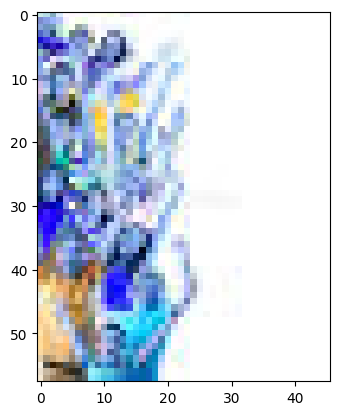

In [107]:
#Reference Image Example
img =cv2.imread(os.path.join('data', 'happy', 'image.jpeg'))
img.shape #58 Pixel High, 46 Pixel Length, 3 means colored

plt.imshow(img)
plt.show()

In [110]:
import cv2
import imghdr

data_dir = 'data'
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

# os.listdir(os.path.join(data_dir, 'happy'))

#2 Directory: Happy and Sad(Store each Image as numpy array)
for image_class in os.listdir(data_dir):
    if image_class != '.DS_Store':
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path) #The extension of image matches with whats allowed
                if tip not in image_extensions:
                    print("Image Type not in Extension List {}".format(image_path))
                    os.remove(imag_path) #Delete File
            except Exception as e:
                print('Issue with image'.format(image_path))
                

Image Type not in Extension List data/happy/.DS_Store
Issue with image
Image Type not in Extension List data/happy/67891c01e6414a49171f7cdd_670dc58a1a956551043bb21f_traitshapp.webp
Issue with image


libpng warning: iCCP: known incorrect sRGB profile


Image Type not in Extension List data/happy/getty_143919450_9706479704500104_51510.webp
Issue with image
Image Type not in Extension List data/happy/Happy People.jpg
Issue with image
Image Type not in Extension List data/happy/1715.jpg.txt
Issue with image
Image Type not in Extension List data/happy/getty_152414899_97046097045006_68075.webp
Issue with image
Image Type not in Extension List data/sad/Man with Sad Expression Standing 2 SVG.svg
Issue with image
Image Type not in Extension List data/sad/sad-person-320x600-c-center.webp
Issue with image
Image Type not in Extension List data/sad/.DS_Store
Issue with image
Image Type not in Extension List data/sad/getty_91745128_333755.webp
Issue with image
Image Type not in Extension List data/sad/person-alone-on-park-bench.jpg
Issue with image


# Load Data

In [ ]:
tf.keras.utils.image_dataset_from_directory??


In [111]:
#tf.data.Dataset
#Get Information on something do: tf.data.Dataset??

#Builds Image Dataset for us[Create Data pipeline]
data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 10, class_names=['happy', 'sad'], seed=42)

#View the Images in the Dataset [Access Datapipe line]
data_iterator = data.as_numpy_iterator()

#Seperate Images into Batches[Each Batch Holds the same amount of images] --> Consists of Images, Class Label
batch = data_iterator.next()

print(f"Labels for Batch: {batch[1]} and Images of Batch: {batch[0]}")


Found 168 files belonging to 2 classes.
Labels for Batch: [0 1 1 1 0 0 0 1 0 0] and Images of Batch: [[[[229.       232.       237.      ]
   [229.       232.       237.      ]
   [230.       233.       238.      ]
   ...
   [192.42969  199.42969  218.42969 ]
   [195.       202.       220.      ]
   [195.       202.       220.      ]]

  [[229.       232.       237.      ]
   [229.       232.       237.      ]
   [230.       233.       238.      ]
   ...
   [193.69788  200.69788  219.69788 ]
   [194.39062  202.60938  220.      ]
   [194.39062  202.60938  220.      ]]

  [[229.       232.       237.      ]
   [229.       232.       237.      ]
   [230.       233.       238.      ]
   ...
   [193.96875  200.96875  219.96875 ]
   [191.96875  199.96875  218.96875 ]
   [191.96875  199.96875  218.96875 ]]

  ...

  [[181.47742  177.52429  174.53992 ]
   [176.3617   175.35132  173.38245 ]
   [216.40479  215.95166  216.17822 ]
   ...
   [ 97.3678    39.274048  38.305298]
   [ 97.848755  41.801

2026-01-03 11:22:48.217584: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


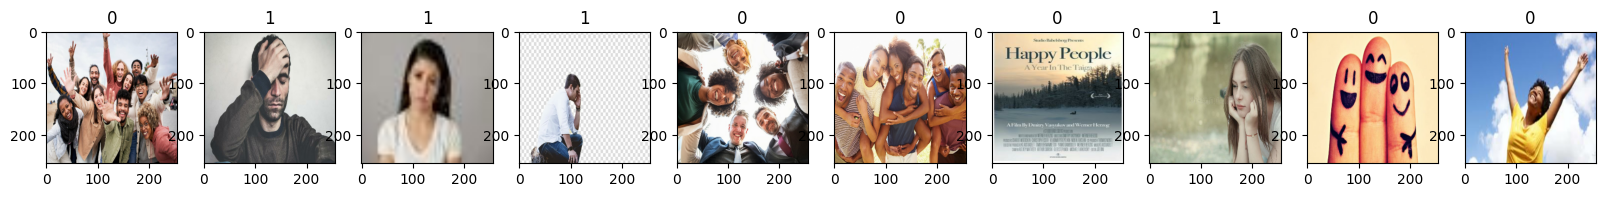

In [112]:
#Classify Images for us to know which is the Positive Class(Sad is the Positive Class)
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:11]): #First 4 Images
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) #Tells us Whether Happy is 0 or 1, batch[1] give us Class Label

# Preprocess Data

In [113]:
#Scale Data(Scale to 0 or 1 so every img on same scale) --> There more transformation check guide for more
#scaled - batch[0]/ batch[0].max() --> To get values of 0 and 1
data = data.map(lambda x,y: (x/255, y))

#Next Batch Images
scaled_iterator = data.as_numpy_iterator()


1.0


2026-01-03 11:22:53.446905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


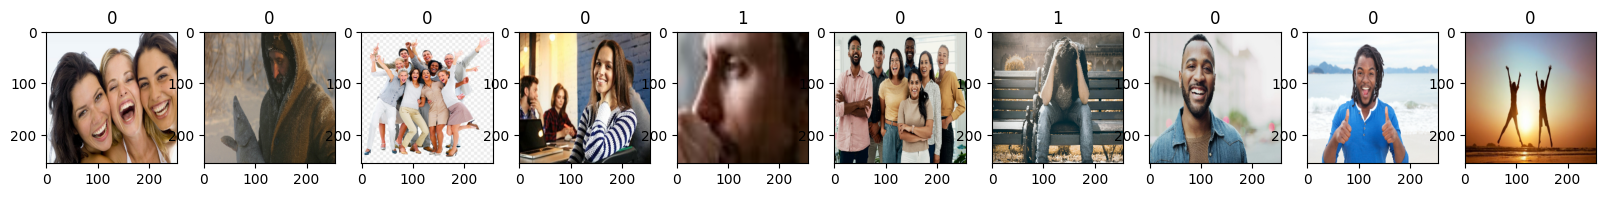

In [114]:
batch = scaled_iterator.next()
print(batch[0].max())

fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:11]): 
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx]) 

# Split Data into Train and Testing Paritions --> Prevent Overfitting

In [115]:
print(len(data)) #We have 18 Batches
train_size = int(len(data) * .7) #70% of data should be train
validation_size = int(len(data) * .2) + 1 #20% of data should be validation
test_size = int(len(data) * .1) + 1
print(train_size + validation_size + test_size)

17
17


In [116]:
#More Standard Way of Splitting
train = data.take(train_size) #How much data to take in that specific partition
val = data.skip(train_size).take(validation_size) #Skips the Train Allocated Batches and takes the validation 
test = data.skip(train_size + validation_size).take(test_size)

# Creating the Deep Learning Model

In [117]:
#Great if you have one Data Input and One Data Output, Functional is if you have Multiple Input and Outputs(Multi Perceptron)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [118]:
#You could pass in the different hidden layers like Sequential([Conv2D(), MaxPooling2D()]), start of architecture
model = Sequential() 

#Convolutionary Layer: 16 Filters, Filter is a 3 by 3, Stride of 1 pixel, Input is a 256 by 256 by 3 channels
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
#Maximum Value after Non-Linear Activation Function(ConV2D gives 254 by 254 qnd MaxPooling2D gives 254/2)
model.add(MaxPooling2D())

#Should Add Padding here to  preserve the architecture after the MaxPooling so its 127 not 125


#Layer 2
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

#Layer 3
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())

#Flatten, Condense Rows and Width and #Filters forms the channel. Gives one Value 
#Converts the 30 by 30 by 16 which is the #Outputs to be Flatten which results in a Single Dimensional Tensor
model.add(Flatten())

#Output Layer

#Dense Layers connect the neurons[Fully Connect Layers]
model.add(Dense(256, activation='relu'))
# Sigmoid gives us log probs that will be compared with a default threshold for Binary Classification(Single Output 0 to 1)
model.add(Dense(1, activation='sigmoid'))



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
#Model uses Adam Optimizer to find the best weights, loss is used reduce BinaryCross Entropy, Metric to assess is Accuracy
# tf.optimizers.Adadelta
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [120]:
#Gives us an Summary of the Architecture of the Neural Network --> How each Layer is Converted
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Neural Network

In [121]:
#Create a Log Diretory to save Training Info
logdir = 'logs'

#used Save model or review past results
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [122]:
#Fit the Model(20 Full iterations --> Epoch), Stores all Training Model Data into hist
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

'''
Model is a good Model as both Validation and Train accuracy went to 1 but the really good thing
is that both losses went from high loss to low loss at the end of the 20 epochs
'''

Epoch 1/20


2026-01-03 11:23:06.857893: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4415 - loss: 1.1594

2026-01-03 11:23:08.694931: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.5273 - loss: 0.9282 - val_accuracy: 0.5750 - val_loss: 0.6269
Epoch 2/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.6000 - loss: 0.6216

2026-01-03 11:23:09.315855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6662 - loss: 0.6155

2026-01-03 11:23:10.561478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.6727 - loss: 0.6195 - val_accuracy: 0.8750 - val_loss: 0.4764
Epoch 3/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.5000 - loss: 0.6633

2026-01-03 11:23:11.344689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7211 - loss: 0.4953 

2026-01-03 11:23:12.532540: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.7545 - loss: 0.4627 - val_accuracy: 0.7000 - val_loss: 0.5459
Epoch 4/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8000 - loss: 0.4259

2026-01-03 11:23:13.320835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7792 - loss: 0.4266

2026-01-03 11:23:14.413914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.7818 - loss: 0.4171 - val_accuracy: 0.8500 - val_loss: 0.3705
Epoch 5/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 1.0000 - loss: 0.2979

2026-01-03 11:23:15.078511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9228 - loss: 0.2890

2026-01-03 11:23:16.414265: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.9000 - loss: 0.3026 - val_accuracy: 1.0000 - val_loss: 0.1474
Epoch 6/20


2026-01-03 11:23:17.027218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9646 - loss: 0.1985

2026-01-03 11:23:18.361647: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9455 - loss: 0.2283 - val_accuracy: 0.8750 - val_loss: 0.2753
Epoch 7/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 1.0000 - loss: 0.2408

2026-01-03 11:23:18.948825: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9361 - loss: 0.2047

2026-01-03 11:23:20.434430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.9091 - loss: 0.2084 - val_accuracy: 0.9000 - val_loss: 0.1785
Epoch 8/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 0.1703

2026-01-03 11:23:21.164654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9602 - loss: 0.1472

2026-01-03 11:23:22.261490: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9636 - loss: 0.1166 - val_accuracy: 0.9750 - val_loss: 0.1121
Epoch 9/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 1.0000 - loss: 0.0827

2026-01-03 11:23:22.889008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.9940 - loss: 0.0708

2026-01-03 11:23:24.088918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9818 - loss: 0.0784 - val_accuracy: 0.9500 - val_loss: 0.0788
Epoch 10/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.9750 - loss: 0.0612

2026-01-03 11:23:24.784833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9799 - loss: 0.0660

2026-01-03 11:23:25.751614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9818 - loss: 0.0569 - val_accuracy: 0.9750 - val_loss: 0.0604
Epoch 11/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 1.0000 - loss: 0.0042

2026-01-03 11:23:26.394264: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9604 - loss: 0.0614

2026-01-03 11:23:27.742558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.9545 - loss: 0.0719 - val_accuracy: 0.9750 - val_loss: 0.1144
Epoch 12/20


2026-01-03 11:23:28.369010: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9725 - loss: 0.0831

2026-01-03 11:23:29.611745: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9909 - loss: 0.0645 - val_accuracy: 0.9750 - val_loss: 0.0441
Epoch 13/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 1.0000 - loss: 0.0204

2026-01-03 11:23:30.320807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 1.0000 - loss: 0.0273

2026-01-03 11:23:31.660906: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 1.0000 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 14/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 1.0000 - loss: 0.0025

2026-01-03 11:23:32.537482: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 0.0069

2026-01-03 11:23:33.861015: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 15/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0163

2026-01-03 11:23:34.647609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.0133

2026-01-03 11:23:35.737733: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 16/20


2026-01-03 11:23:36.274499: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0052

2026-01-03 11:23:37.801357: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 17/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 1.0000 - loss: 0.0032

2026-01-03 11:23:38.289469: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0095

2026-01-03 11:23:39.717156: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 18/20


2026-01-03 11:23:40.312201: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0038

2026-01-03 11:23:41.465820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 8.9368e-04
Epoch 19/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 1.0000 - loss: 0.0026

2026-01-03 11:23:42.256335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0026 

2026-01-03 11:23:43.442478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 20/20


2026-01-03 11:23:43.911198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 5.9098e-04

2026-01-03 11:23:45.225676: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 5.2530e-04


# Tracking Loss of the Model/Evaluation

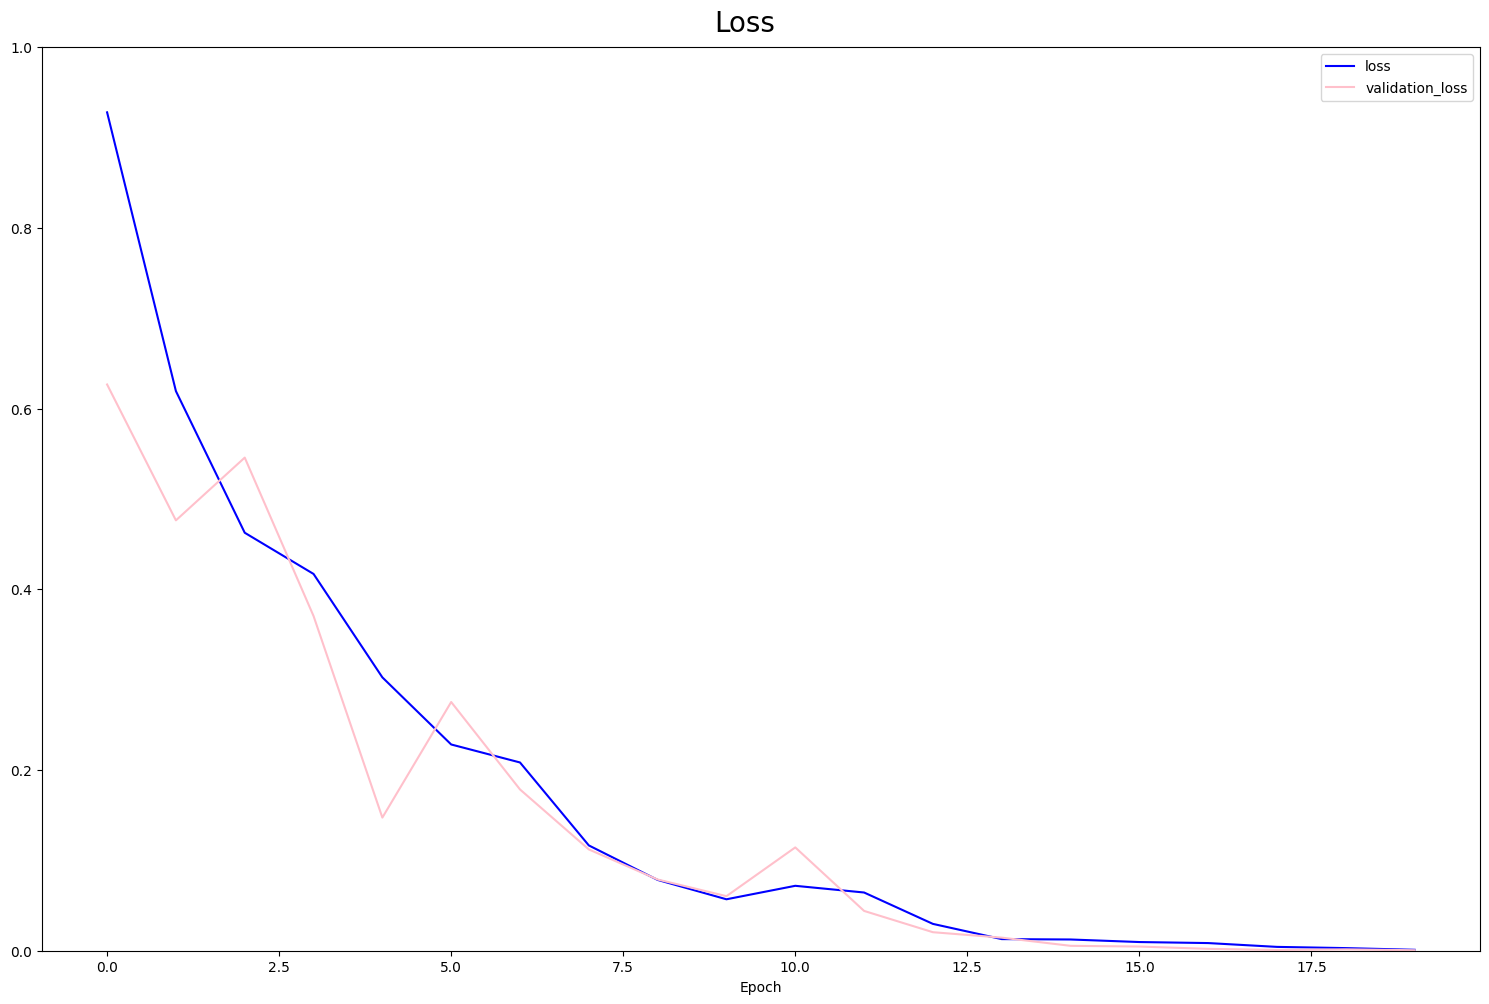

In [133]:
fig = plt.figure(figsize=(15,10))
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'],color='pink', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylim(0,1.0)
plt.show()


# Evaluate Performance

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [135]:
precision = Precision()
recall = Recall()
bin_acc = BinaryAccuracy()

In [138]:
#Test the EM on Test Data Set(Update State --> Measures EM and Stores in Object)
for batch in test.as_numpy_iterator():
    #Image and Class Label
    X, y = batch
    y_hat = model.predict(X)
    precision.update_state(y, y_hat)
    recall.update_state(y, y_hat)
    bin_acc.update_state(y, y_hat)



2026-01-03 12:13:28.658502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


2026-01-03 12:13:29.597642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [141]:
#All of them are 1.0 or 100% Accurate which means Model is PERFECT even on unseen data 
print(precision.result().numpy(), recall.result().numpy(), bin_acc.result().numpy())

1.0 1.0 1.0


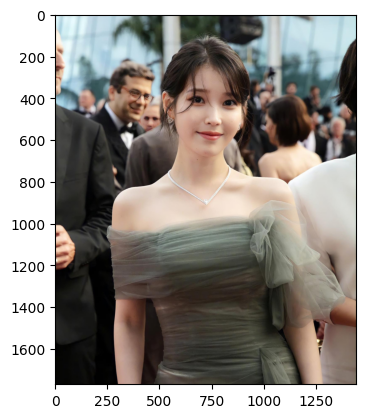

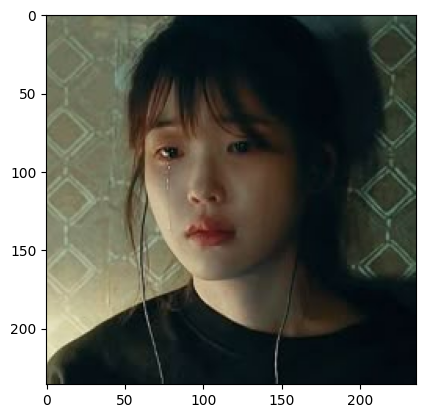

In [169]:
#Test on Data outside of our Batch
img = cv2.imread('data/iu.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


img2 = cv2.imread('data/iu_sad.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()



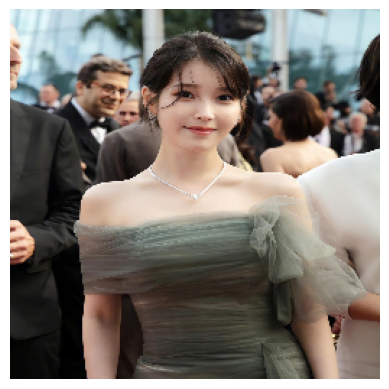

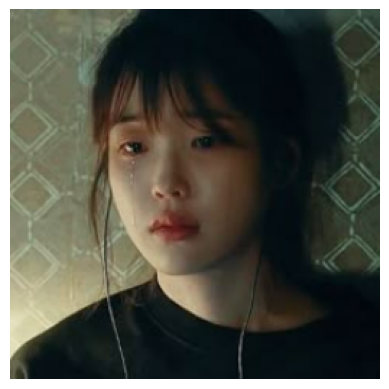

In [171]:
#Resize Image to Fit Architecture of the Neural Network
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img_rgb, (256, 256))
#Cast so Useable(Change data type of tensor)
resize = tf.cast(resize, tf.uint8)

plt.imshow(resize.numpy())
plt.axis("off")
plt.show()



img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
resize2 = tf.image.resize(img_rgb2, (256, 256))

resize2 = tf.cast(resize2, tf.uint8)

plt.imshow(resize2.numpy())
plt.axis("off")
plt.show()


In [172]:
#Prediction of Unseen Data not in any Batch --> Correct as classify as happy as Threshold is 0.5
y_hat = []
y_hat.append(model.predict(np.expand_dims(resize/255, 0)))
y_hat.append(model.predict(np.expand_dims(resize2/255, 0)))
print('Prediction of NN of Img 1: ', y_hat[0])
print('Prediction of NN of Img 2: ', y_hat[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction of NN of Img 1:  [[0.00110714]]
Prediction of NN of Img 2:  [[0.94287616]]


# Save the Model

In [174]:
from tensorflow.keras.models import load_model


In [176]:
#Seralize Model
model.save(os.path.join('models', 'imgclassifier.h5'))

new_model = load_model(os.path.join('models', 'imgclassifier.h5'))

In [178]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0.00110714]], dtype=float32)